## imports

In [ ]:
!pip install bs4==0.0.1



In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from random import randint
from time import sleep
import pandas as pd
import numpy as np

## webscraping

In [ ]:
baseurl = "https://www.yelp.com/"





headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML,)'

}

productlinks = []

pglist = [0,10,20,30,40,50,60,70,80,90,100,110]

hello_list = []

for x in pglist:
    

    r = requests.get(f'https://www.yelp.com/search?find_desc=Hotels&find_loc=barcelona&sortby=rating&start={x}')

    soup = BeautifulSoup(r.content, 'lxml')

    productlist = soup.find_all("li", class_="border-color--default__09f24__1eOdn")



 
    for item in productlist:
        for link in item.find_all("a", href=True):
            try:
                if link["href"].endswith("osq=Hotels") and link['href'] not in hello_list:
                    hello_list.append(link['href'])
                    print(link['href'])
            except Exception as e:
                print(e)


/biz/hotel-cotton-house-barcelona?osq=Hotels
/biz/hotel-cotton-house-barcelona?hrid=UhacxWD6JFmTDR8cjGJrPQ&osq=Hotels
/biz/villa-emilia-barcelona-2?osq=Hotels
/biz/villa-emilia-barcelona-2?hrid=XzFChulh4XIhlas5PWO79w&osq=Hotels
/biz/alma-barcelona-barcelona?osq=Hotels
/biz/alma-barcelona-barcelona?hrid=Sxk8jMtHP03IOGOO5E6Kbg&osq=Hotels
/biz/hotel-1898-barcelona?osq=Hotels
/biz/hotel-1898-barcelona?hrid=Qw4zcOTl0NoJoJbgdXX4QA&osq=Hotels
/biz/the-serras-barcelona?osq=Hotels
/biz/the-serras-barcelona?hrid=RqtEKBSULbtGKbmkD1-dZg&osq=Hotels
/biz/barcel%C3%B3-raval-barcelona?osq=Hotels
/biz/barcel%C3%B3-raval-barcelona?hrid=uogFvJs7Wx8fIyVJ_uO4lg&osq=Hotels
/biz/olivia-balmes-barcelona?osq=Hotels
/biz/olivia-balmes-barcelona?hrid=3DbdXso0AZrNclxc9cyTMQ&osq=Hotels
/biz/casa-fuster-barcelona?osq=Hotels
/biz/casa-fuster-barcelona?hrid=5Goog1Wk76W1NaT5ZDe6bA&osq=Hotels
/biz/hotel-duquesa-de-cardona-barcelona-2?osq=Hotels
/biz/hotel-duquesa-de-cardona-barcelona-2?hrid=FzDCiqJJLi17xsq7fmxfVw&osq=H

In [ ]:


clean_hello = []
incr_sub = "?hrid"


for item in hello_list:
    if incr_sub in item:
        pass
    else:
        clean_hello.append(item)



final_hello = ["https://www.yelp.com" + s for s in clean_hello]

for item in final_hello:
    print(item)


https://www.yelp.com/biz/hotel-cotton-house-barcelona?osq=Hotels
https://www.yelp.com/biz/villa-emilia-barcelona-2?osq=Hotels
https://www.yelp.com/biz/alma-barcelona-barcelona?osq=Hotels
https://www.yelp.com/biz/hotel-1898-barcelona?osq=Hotels
https://www.yelp.com/biz/the-serras-barcelona?osq=Hotels
https://www.yelp.com/biz/barcel%C3%B3-raval-barcelona?osq=Hotels
https://www.yelp.com/biz/olivia-balmes-barcelona?osq=Hotels
https://www.yelp.com/biz/casa-fuster-barcelona?osq=Hotels
https://www.yelp.com/biz/hotel-duquesa-de-cardona-barcelona-2?osq=Hotels
https://www.yelp.com/biz/hotel-arts-barcelona-barcelona?osq=Hotels
https://www.yelp.com/biz/el-palace-barcelona?osq=Hotels
https://www.yelp.com/biz/hotel-europark-barcelona?osq=Hotels
https://www.yelp.com/biz/the-corner-hotel-barcelona?osq=Hotels
https://www.yelp.com/biz/le-m%C3%A9ridien-barcelona-barcelona-7?osq=Hotels
https://www.yelp.com/biz/hotel-u232-barcelona-2?osq=Hotels
https://www.yelp.com/biz/hotel-crowne-plaza-fira-center-barcel

In [ ]:
hotel_list = []

for link in final_hello:

    sleep(randint(8,13))
    r = requests.get(link, headers=headers)

    soup = BeautifulSoup(r.content, 'lxml')    

    try:
        hotel_name = soup.find("h1", class_= "css-11q1g5y").text.strip()
    except:
        hotel_name = "na"

    try:    
        hotel_address = soup.find("p", class_= "css-1bmgof7").text.strip()
    except:
        hotel_address = "na"

    try:
        hotel_postcode = soup.find("p", class_= "css-znumc2").text.strip()
    except:
        hotel_postcode = "na"

    
    try:
        hotel_strreviews = soup.find("span", class_= "css-bq71j2").text.strip()

        hotel_reviewslist = [int(s) for s in hotel_strreviews.split() if s.isdigit()]

  
        hotel_reviews = hotel_reviewslist[0]
    except:
        hotel_reviews = "na"    

    try:
        stars = soup.find("div", class_="i-stars__373c0__1T6rz i-stars--large-5__373c0__1GcGD border-color--default__373c0__30oMI overflow--hidden__373c0__2B0kz")  
        hotel_stars = stars["aria-label"]
        hotel_ratings_list = hotel_stars.split("star")
        hotel_rating = float(hotel_ratings_list[0])
    except:
        print("no 5 rating found")
        try:
            stars = soup.find("div", class_="i-stars__373c0__1T6rz i-stars--large-4-half__373c0__2lYkD border-color--default__373c0__30oMI overflow--hidden__373c0__2B0kz")
            hotel_stars = stars["aria-label"]
            hotel_ratings_list = hotel_stars.split("star")
            hotel_rating = float(hotel_ratings_list[0])
        except:
            print("no 4.5 rating found")
            try:
                stars = soup.find("div", class_="i-stars__373c0__1T6rz i-stars--large-4__373c0__1d6HV border-color--default__373c0__30oMI overflow--hidden__373c0__2B0kz")
                hotel_stars = stars["aria-label"]
                hotel_ratings_list = hotel_stars.split("star")
                hotel_rating = float(hotel_ratings_list[0])
            except:
                print("no 4 rating found")     
                try:
                    stars = soup.find("div", class_="i-stars__373c0__1T6rz i-stars--large-3-half__373c0__2z4jR border-color--default__373c0__30oMI overflow--hidden__373c0__2B0kz")
                    hotel_stars = stars["aria-label"]
                    hotel_ratings_list = hotel_stars.split("star")
                    hotel_rating = float(hotel_ratings_list[0])
                except:
                    print("no 3.5 rating found")
                    try:
                        stars = soup.find("div", class_="i-stars__373c0__1T6rz i-stars--large-3__373c0__3_Jon border-color--default__373c0__30oMI overflow--hidden__373c0__2B0kz")
                        hotel_stars = stars["aria-label"]
                        hotel_ratings_list = hotel_stars.split("star")
                        hotel_rating = float(hotel_ratings_list[0])
                    except:
                        print("no 3 rating found")



    try:
        price_symrange =  str(soup.find_all("span", class_= "css-1xxismk"))

        price_listrange = re.findall("€", price_symrange)

        price_range = "null"



        if len(price_listrange) == 1:
            price_range = "Low"
        elif len(price_listrange) == 2:
            price_range = "Medium-Low"
        elif len(price_listrange) == 3:
            price_range = "Medium-High"
        elif len(price_listrange) == 4:
            price_range = "High"
        else:
            pass
    except:
        price_range = "na"

 


    try:
        amenities = soup.find("div", class_= "arrange__373c0__UHqhV gutter-2__373c0__3Zpeq layout-wrap__373c0__34d4b layout-2-units__373c0__3CiAk border-color--default__373c0__2oFDT").text
        
        hotel_amenities = re.sub(r"(\w)([A-Z])", r"\1 \2", amenities)
    except:
        hotel_amenities = "na"
    
    
    
    hotels = {
    'name' : hotel_name,
    'reviews' : hotel_reviews,
    'rating' : hotel_rating,
    'address' : hotel_address,
    'postcode' : hotel_postcode,
    'price range' : price_range,
    'amenities' : hotel_amenities
    }
    hotel_list.append(hotels)




no 5 rating found
no 5 rating found
no 4.5 rating found
no 4 rating found
no 3.5 rating found
no 3 rating found
no 5 rating found
no 5 rating found
no 5 rating found
no 5 rating found
no 5 rating found
no 5 rating found
no 4.5 rating found
no 4 rating found
no 3.5 rating found
no 3 rating found
no 5 rating found
no 4.5 rating found
no 5 rating found
no 5 rating found
no 4.5 rating found
no 4 rating found
no 3.5 rating found
no 3 rating found
no 5 rating found
no 5 rating found
no 4.5 rating found
no 5 rating found
no 4.5 rating found
no 4 rating found
no 3.5 rating found
no 3 rating found
no 5 rating found
no 5 rating found
no 4.5 rating found
no 5 rating found
no 5 rating found
no 5 rating found
no 5 rating found
no 4.5 rating found
no 5 rating found
no 4.5 rating found
no 5 rating found
no 4.5 rating found
no 5 rating found
no 4.5 rating found
no 5 rating found
no 4.5 rating found
no 5 rating found
no 4.5 rating found
no 4 rating found
no 3.5 rating found
no 3 rating found
no 5 ratin

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
hot_df = pd.DataFrame(hotel_list)

print(hot_df)

                                name reviews  rating  \
0                 Hotel Cotton House      49     4.5   
1                       Villa Emilia      25     5.0   
2                     Alma Barcelona      28     4.5   
3                         Hotel 1898      77     4.5   
4                         The Serras      14     5.0   
..                               ...     ...     ...   
115                       ABaC Hotel       4     5.0   
116                    Hotel Astoria       8     4.0   
117                   Praktik Garden      13     3.5   
118          Hotel Negresco Princess      11     3.5   
119  Hotel Catalonia Plaza Catalunya       5     4.5   

                                  address         postcode  price range  \
0    Gran Via de les Corts Catalanes, 670  08010 Barcelona  Medium-High   
1                 Carrer de Calàbria, 115  08015 Barcelona   Medium-Low   
2                 Carrer de Mallorca, 271  08008 Barcelona  Medium-High   
3                          

## data analysis &amp; cleaning

In [ ]:
df = pd.read_csv('hotels.csv')
df.head()

,name,reviews,rating,address,postcode,price range,amenities
0,Hotel Cotton House,49,4.5,"Gran Via de les Corts Catalanes, 670",08010 Barcelona,Medium-High,Accepts Credit Cards Free Wi-Fi
1,Villa Emilia,25,5.0,"Carrer de Calàbria, 115",08015 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi Dogs Allowed
2,Alma Barcelona,28,4.5,"Carrer de Mallorca, 271",08008 Barcelona,Medium-High,Accepts Credit Cards Free Wi-Fi
3,Hotel 1898,77,4.5,"La Rambla, 109",08002 Barcelona,Medium-High,Accepts Credit Cards Free Wi-Fi Dogs Not Allowed
4,The Serras,14,5.0,"Passeig de Colom, 9",08002 Barcelona,High,Accepts Credit Cards Free Wi-Fi Dogs Not Allowed


In [ ]:
df[df['price range'].isna()]


,name,reviews,rating,address,postcode,price range,amenities
37,Almanac,7,5.0,"Gran Via de les Corts Catalanes, 619",08007 Barcelona,NaN,Accepts Credit Cards Free Wi-Fi
38,Hotel Sofia,6,5.0,"Plaça de Pius XII, 4",08028 Barcelona,NaN,na
55,Yurbban Passage,9,4.5,"Carrer de Trafalgar, 26",08003 Barcelona,NaN,Accepts Credit Cards Free Wi-Fi
77,na,na,5.0,na,na,NaN,na
94,Hotel Barcelona 1882,5,4.5,"Carrer de Còrsega, 482",08025 Barcelona,NaN,na
100,Yeah Hostel,7,5.0,"Carrer de Girona, 176",08037 Barcelona,NaN,na


In [ ]:
# Here we see 77 misses a lot of value let's drop it
df.drop([df.index[77]],inplace=True)

In [ ]:
df['price range'].fillna('Medium-Low',inplace=True)

In [ ]:
df.isnull().sum()

name           0
reviews        0
rating         0
address        0
postcode       0
price range    0
amenities      0
dtype: int64

In [ ]:
# df = df.replace('na', np.nan)
# df = df.replace('null', np.nan)

In [ ]:
df.head()

,name,reviews,rating,address,postcode,price range,amenities
0,Hotel Cotton House,49,4.5,"Gran Via de les Corts Catalanes, 670",08010 Barcelona,Medium-High,Accepts Credit Cards Free Wi-Fi
1,Villa Emilia,25,5.0,"Carrer de Calàbria, 115",08015 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi Dogs Allowed
2,Alma Barcelona,28,4.5,"Carrer de Mallorca, 271",08008 Barcelona,Medium-High,Accepts Credit Cards Free Wi-Fi
3,Hotel 1898,77,4.5,"La Rambla, 109",08002 Barcelona,Medium-High,Accepts Credit Cards Free Wi-Fi Dogs Not Allowed
4,The Serras,14,5.0,"Passeig de Colom, 9",08002 Barcelona,High,Accepts Credit Cards Free Wi-Fi Dogs Not Allowed


In [ ]:
# missing_value_counts = df.isna().sum()

# missing_value_counts[:] 

In [ ]:
df.describe()
# Some information out of here:
# min.rating  = 3
# max.rating = 5
# mean = 4.26


,rating
count,109.000000
mean,4.261468
std,0.449260
min,3.000000
25%,4.000000
50%,4.500000
75%,4.500000
max,5.000000


In [ ]:
df['rating'].max()

5.0

In [ ]:
# print(df.loc[df['price range'] == 'nan'])

In [ ]:
df['price range'].value_counts()


Medium-Low     62
Medium-High    35
High            9
Low             3
Name: price range, dtype: int64

<AxesSubplot:>

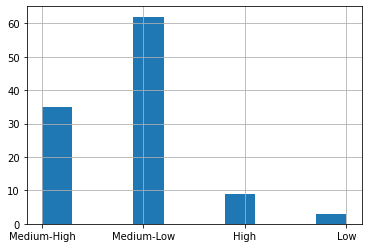

In [ ]:
df["price range"].hist(bins=10)

# I tried making a histogram of the price range to have a pictorial representation. 
# This is to help us have a sense of pricing recommendation to our client (boss).

In [ ]:
df[df['price range'] == 'Medium-Low']

#Thank you for this Shamil

,name,reviews,rating,address,postcode,price range,amenities
1,Villa Emilia,25,5.0,"Carrer de Calàbria, 115",08015 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi Dogs Allowed
5,Barceló Raval,54,4.5,"Rambla del Raval, 17 - 21",08001 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi Dogs Not Allowed
10,Do,13,4.5,"Plaça Reial, 1",08002 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi
11,Pulitzer Barcelona,40,4.0,"Carrer Bergara, 8",08002 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi
14,Hotel Barcelona Universal,41,4.0,"Avinguda Paral-lel, 76",08001 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi
...,...,...,...,...,...,...,...
102,Chic&Basic Born,12,4.0,"Carrer de la Princesa, 50",08003 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi
103,Silken Concordia,10,4.0,"Avinguda del Parallel, 115,",08004 Barcelona,Medium-Low,Takes Reservations Offers Delivery No Takeout ...
104,Petit Palace Boqueria Garden,21,3.5,"Carrer de la Boqueria, 10",08002 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi Dogs Allowed
107,Hotel Regencia Colon,8,4.0,"Carrer Sagristans, 13/17",08002 Barcelona,Medium-Low,Accepts Credit Cards Free Wi-Fi


In [ ]:
# I want to do a visual comparison of hotels in different postcodes with their price ranges

b = df.groupby("postcode")["rating"].value_counts()


In [ ]:
# So, I made a data frame of the two columns (variables)

data = pd.DataFrame(a)
data

NameError: name 'a' is not defined

<AxesSubplot:xlabel='postcode'>

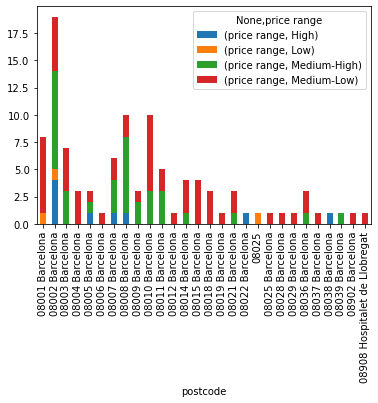

In [ ]:
# Then plotted a stacked bar chart for the comparison and visualisation 

data.unstack().plot(kind='bar', stacked=True)

In [ ]:
b = df.groupby("postcode")["rating"].value_counts()

In [ ]:
data2 = pd.DataFrame(b)
data2

rating
postcode                      rating        
08001 Barcelona               4.5          6
                              3.5          1
                              4.0          1
08002 Barcelona               4.5          8
                              4.0          6
                              5.0          4
                              3.5          1
08003 Barcelona               4.0          5
                              4.5          2
                              5.0          1
08004 Barcelona               3.0          1
                              4.0          1
                              4.5          1
08005 Barcelona               4.0          2
                              3.5          1
08006 Barcelona               4.5          1
08007 Barcelona               4.0          3
                              4.5          2
                              3.5          1
                              5.0          1
08008 Barcelona               4.5          6
                              4.0          4
08009 Barcelona               4.0          2
                              3.5          1
08010 Barcelona               4.5          5
                              4.0          2
                              5.0          2
                              3.5          1
08011 Barcelona               4.5          2
                              3.0          1
                              4.0          1
                              5.0          1
08012 Barcelona               4.5          1
08014 Barcelona               3.5          2
                              4.0          2
08015 Barcelona               4.5          3
                              5.0          1
08018 Barcelona               3.5          1
                              4.0          1
                              4.5          1
08019 Barcelona               4.0          1
08021 Barcelona               4.0          2
                              5.0          1
08022 Barcelona               5.0          1
08025                         4.5          1
08025 Barcelona               4.5          2
08028 Barcelona               4.5          1
                              5.0          1
08029 Barcelona               4.0          1
08036 Barcelona               4.0          3
08037 Barcelona               4.5          1
                              5.0          1
08038 Barcelona               4.0          1
08039 Barcelona               3.5          1
08902 Barcelona               4.0          1
08908 Hospitalet de Llobregat 4.0          1

<AxesSubplot:xlabel='postcode'>

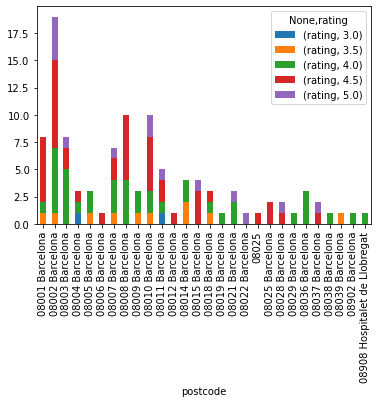

In [ ]:
data2.unstack().plot(kind='bar', stacked=True)

In [ ]:
sns.displot(df["rating"], label = "rating", kde = True)

NameError: name 'sns' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=526677fa-2acc-4bfb-a9de-71741f421eb9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>